In [4]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# **Time-Series Data**

In [6]:
ng=pd.read_csv('/content/Natural_Gas.csv')
ng.head()

,Date,Price,Open,High,Low,Vol.(in K ),Change %
0,"Jun 16, 2022",7.67,7.57,7.67,7.51,NaN,0.03
1,"Jun 15, 2022",7.42,7.27,7.70,7.20,123.59,0.03
2,"Jun 14, 2022",7.19,8.69,8.89,7.01,273.72,-0.16
3,"Jun 13, 2022",8.61,8.92,8.95,8.38,167.56,-0.03
4,"Jun 10, 2022",8.85,9.00,9.15,8.62,134.61,-0.01


## **Exploratory Data Analysis**

In [7]:
ng.describe()

,Price,Open,High,Low,Vol.(in K ),Change %
count,2734.000000,2734.000000,2734.000000,2734.000000,2627.000000,2734.000000
mean,3.176342,3.178040,3.245688,3.111752,136.397214,0.000830
std,1.062301,1.060537,1.102369,1.022979,60.982998,0.031568
min,1.480000,1.440000,1.570000,1.430000,1.470000,-0.170000
25%,2.580000,2.590000,2.630000,2.540000,99.790000,-0.020000
50%,2.910000,2.910000,2.960000,2.870000,134.950000,0.000000
75%,3.650000,3.650000,3.720000,3.590000,170.210000,0.020000
max,9.320000,9.360000,9.660000,9.200000,459.200000,0.220000


In [8]:
# Feature data types
ng.dtypes

Date            object
Price          float64
Open           float64
High           float64
Low            float64
Vol.(in K )    float64
Change %       float64
dtype: object

In [9]:
ng['Vol.(in K )']=ng['Vol.(in K )'].fillna(ng['Vol.(in K )'].mean())
ng.head()

,Date,Price,Open,High,Low,Vol.(in K ),Change %
0,"Jun 16, 2022",7.67,7.57,7.67,7.51,136.397214,0.03
1,"Jun 15, 2022",7.42,7.27,7.70,7.20,123.590000,0.03
2,"Jun 14, 2022",7.19,8.69,8.89,7.01,273.720000,-0.16
3,"Jun 13, 2022",8.61,8.92,8.95,8.38,167.560000,-0.03
4,"Jun 10, 2022",8.85,9.00,9.15,8.62,134.610000,-0.01


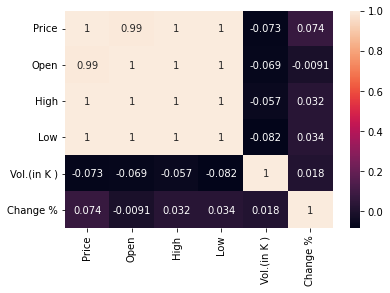

In [10]:
# Corellation Plot
sns.heatmap(ng.corr(),annot=True)

## **Fitting The Model**

In [11]:
price=ng['Price']

In [12]:
def df_to_X_y(data, window_size):
  data_np = data.to_numpy()
  X = []
  y = []
  for i in range(len(data_np)-window_size):
    row = [[a] for a in data_np[i:i+window_size]]
    X.append(row)
    label = data_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [13]:
x,y=df_to_X_y(price,10)

In [14]:
x_train,y_train=x[1800:2724],y[1800:2724]
x_val,y_val=x[800:1800],y[800:1800]
x_test,y_test=x[0:800],y[0:800]

### **LSTM**

In [15]:
# Building the model
model1=Sequential()
model1.add(InputLayer((10,1)))
model1.add(LSTM(64))
model1.add(Dense(10,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,557
Trainable params: 17,557
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Saving the best model and evaluating the best model of them all
checkPoint1=ModelCheckpoint('model1/',save_best_only=True)
model1.compile(optimizer=Adam(learning_rate=0.01),loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])

In [17]:
# Training the model
model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,callbacks=[checkPoint1])

Epoch 1/20
28/29 [===========================>..] - ETA: 0s - loss: 0.9903 - root_mean_squared_error: 0.9951

29/29 [==============================] - 8s 198ms/step - loss: 0.9682 - root_mean_squared_error: 0.9840 - val_loss: 0.4775 - val_root_mean_squared_error: 0.6910
Epoch 2/20
28/29 [===========================>..] - ETA: 0s - loss: 0.1002 - root_mean_squared_error: 0.3166

29/29 [==============================] - 5s 168ms/step - loss: 0.0978 - root_mean_squared_error: 0.3127 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 3/20
27/29 [==========================>...] - ETA: 0s - loss: 0.0278 - root_mean_squared_error: 0.1666

29/29 [==============================] - 5s 179ms/step - loss: 0.0282 - root_mean_squared_error: 0.1680 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1260
Epoch 4/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0214 - root_mean_squared_error: 0.1464 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1542
Epoch 5/20
28/29 [===========================>..] - ETA: 0s - loss: 0.0226 - root_mean_squared_error: 0.1504

29/29 [==============================] - 5s 181ms/step - loss: 0.0223 - root_mean_squared_error: 0.1492 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1194
Epoch 6/20
26/29 [=========================>....] - ETA: 0s - loss: 0.0220 - root_mean_squared_error: 0.1484

29/29 [==============================] - 5s 182ms/step - loss: 0.0210 - root_mean_squared_error: 0.1449 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1104
Epoch 7/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0194 - root_mean_squared_error: 0.1392 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1305
Epoch 8/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0222 - root_mean_squared_error: 0.1491 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1167
Epoch 9/20
23/29 [======================>.......] - ETA: 0s - loss: 0.0274 - root_mean_squared_error: 0.1655

29/29 [==============================] - 5s 179ms/step - loss: 0.0254 - root_mean_squared_error: 0.1593 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073
Epoch 10/20
27/29 [==========================>...] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.1202

29/29 [==============================] - 4s 160ms/step - loss: 0.0146 - root_mean_squared_error: 0.1208 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1030
Epoch 11/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1278
Epoch 12/20
23/29 [======================>.......] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.1158

29/29 [==============================] - 5s 181ms/step - loss: 0.0131 - root_mean_squared_error: 0.1147 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0954
Epoch 13/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0954
Epoch 14/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1113
Epoch 15/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0982
Epoch 16/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1228
Epoch 17/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0098 - val_root_mean_s

29/29 [==============================] - 5s 168ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0915
Epoch 20/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0133 - root_mean_squared_error: 0.1152 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157


In [18]:
model1=load_model('model1/')

In [19]:
predictions1=model1.predict(x_test).flatten()
pred_df1=pd.DataFrame(data={'Predictions':predictions1,'Actual':y_test})
pred_df1.head()

,Predictions,Actual
0,7.305169,8.49
1,7.208788,8.70
2,7.265606,8.15
3,7.127811,8.69
4,7.224791,8.82


In [20]:
model1_mse=mse(y_test,predictions1)
print('LSTM MSE:',str(model1_mse))

LSTM MSE: 0.06975906983883078


Text(0.5, 1.0, 'LSTM Results')

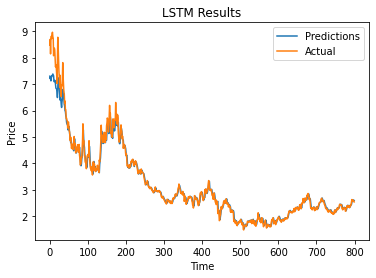

In [21]:
plt.plot(pred_df1['Predictions'],label='Predictions')
plt.plot(pred_df1['Actual'],label='Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.title('LSTM Results')

### **GRU**

In [22]:
model2=Sequential()
model2.add(InputLayer((10,1)))
model2.add(GRU(64))
model2.add(Dense(10,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,525
Trainable params: 13,525
Non-trainable params: 0
_________________________________________________________________


In [23]:
checkPoint2=ModelCheckpoint('model2/',save_best_only=True)
model2.compile(optimizer=Adam(learning_rate=0.01),loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])
model2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,callbacks=[checkPoint2])

Epoch 1/20
28/29 [===========================>..] - ETA: 0s - loss: 1.9018 - root_mean_squared_error: 1.3791

29/29 [==============================] - 8s 205ms/step - loss: 1.8633 - root_mean_squared_error: 1.3650 - val_loss: 0.8565 - val_root_mean_squared_error: 0.9255
Epoch 2/20
29/29 [==============================] - ETA: 0s - loss: 0.4626 - root_mean_squared_error: 0.6802

29/29 [==============================] - 4s 147ms/step - loss: 0.4626 - root_mean_squared_error: 0.6802 - val_loss: 0.4055 - val_root_mean_squared_error: 0.6368
Epoch 3/20
28/29 [===========================>..] - ETA: 0s - loss: 0.3175 - root_mean_squared_error: 0.5634

29/29 [==============================] - 5s 170ms/step - loss: 0.3158 - root_mean_squared_error: 0.5619 - val_loss: 0.1885 - val_root_mean_squared_error: 0.4342
Epoch 4/20
29/29 [==============================] - ETA: 0s - loss: 0.0773 - root_mean_squared_error: 0.2779

29/29 [==============================] - 4s 149ms/step - loss: 0.0773 - root_mean_squared_error: 0.2779 - val_loss: 0.0414 - val_root_mean_squared_error: 0.2034
Epoch 5/20
29/29 [==============================] - ETA: 0s - loss: 0.0377 - root_mean_squared_error: 0.1942

29/29 [==============================] - 5s 167ms/step - loss: 0.0377 - root_mean_squared_error: 0.1942 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1512
Epoch 6/20
28/29 [===========================>..] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.1409

29/29 [==============================] - 4s 152ms/step - loss: 0.0197 - root_mean_squared_error: 0.1403 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1242
Epoch 7/20
28/29 [===========================>..] - ETA: 0s - loss: 0.0165 - root_mean_squared_error: 0.1283

29/29 [==============================] - 5s 165ms/step - loss: 0.0168 - root_mean_squared_error: 0.1298 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1169
Epoch 8/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0192 - root_mean_squared_error: 0.1387 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1756
Epoch 9/20
26/29 [=========================>....] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1347

29/29 [==============================] - 4s 151ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1142
Epoch 10/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0163 - root_mean_squared_error: 0.1276 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1393
Epoch 11/20
23/29 [======================>.......] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.1190

29/29 [==============================] - 5s 165ms/step - loss: 0.0151 - root_mean_squared_error: 0.1229 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 12/20
25/29 [========================>.....] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1149

29/29 [==============================] - 4s 149ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1066
Epoch 13/20
28/29 [===========================>..] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1139

29/29 [==============================] - 5s 165ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1003
Epoch 14/20
28/29 [===========================>..] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.1231

29/29 [==============================] - 4s 153ms/step - loss: 0.0154 - root_mean_squared_error: 0.1240 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0971
Epoch 15/20
29/29 [==============================] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.1282

29/29 [==============================] - 5s 170ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958
Epoch 16/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0134 - root_mean_squared_error: 0.1157 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078
Epoch 17/20
29/29 [==============================] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.1168

29/29 [==============================] - 4s 152ms/step - loss: 0.0136 - root_mean_squared_error: 0.1168 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0946
Epoch 18/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0173 - root_mean_squared_error: 0.1314 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0986
Epoch 19/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0155 - root_mean_squared_error: 0.1244 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0955
Epoch 20/20
27/29 [==========================>...] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1121

29/29 [==============================] - 4s 159ms/step - loss: 0.0122 - root_mean_squared_error: 0.1107 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0934


In [24]:
model2=load_model('model2/')
predict2=model2.predict(x_test).flatten()
pred_df2=pd.DataFrame(data={'Predictions':predict2,'Actual':y_test})
pred_df2.head()

,Predictions,Actual
0,6.894263,8.49
1,6.889158,8.70
2,6.929787,8.15
3,6.811335,8.69
4,6.918645,8.82


In [25]:
model2_mse=mse(y_test,predict2)
print('GRU MSE:  ',str(model2_mse))

GRU MSE:   0.09947902443623896


Text(0.5, 1.0, 'GRU Results')

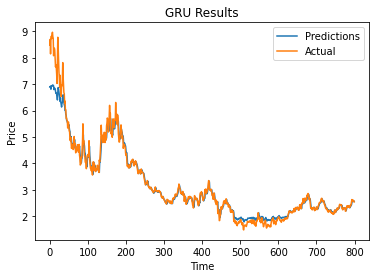

In [26]:
plt.plot(pred_df2['Predictions'],label='Predictions')
plt.plot(pred_df2['Actual'],label='Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.title('GRU Results')

### **Simple RNN**

In [27]:
model3=Sequential()
model3.add(InputLayer((10,1)))
model3.add(SimpleRNN(64))
model3.add(Dense(10,'relu'))
model3.add(Dense(1,'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,885
Trainable params: 4,885
Non-trainable params: 0
_________________________________________________________________


In [28]:
checkPoint3=ModelCheckpoint('model3/',save_best_only=True)
model3.compile(optimizer=Adam(learning_rate=0.01),loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])
model3.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,callbacks=[checkPoint3])

Epoch 1/20
29/29 [==============================] - 3s 72ms/step - loss: 1.0196 - root_mean_squared_error: 1.0097 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1265
Epoch 2/20
29/29 [==============================] - 2s 65ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0977
Epoch 3/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0196 - root_mean_squared_error: 0.1401 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1039
Epoch 4/20
29/29 [==============================] - 2s 82ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0922
Epoch 5/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0154 - root_mean_squared_error: 0.1239 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1155
Epoch 6/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0199 - root_mean_squared_error: 0.1410 - val_loss: 0.0271 - val_root_mean

In [29]:
model3=load_model('model3/')
predict3=model3.predict(x_test).flatten()
pred_df3=pd.DataFrame(data={'Predictions':predict3,'Actual':y_test})
pred_df3.head()

,Predictions,Actual
0,6.881108,8.49
1,6.841843,8.70
2,6.851462,8.15
3,6.749846,8.69
4,6.834507,8.82


In [30]:
model3_mse=mse(y_test,predict3)
print('Simple RNN MSE:  ',str(model3_mse))

Simple RNN MSE:   0.10851922132596022


Text(0.5, 1.0, 'Simple RNN Results')

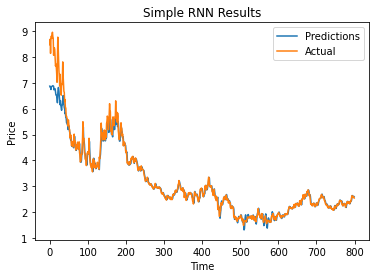

In [31]:
plt.plot(pred_df3['Predictions'],label='Predictions')
plt.plot(pred_df3['Actual'],label='Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.title('Simple RNN Results')